# 練習
## Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

In [3]:
# 準備事項
# Fit the model to the training data (train_data).
# Use a validation split of 20%, 3 epochs and batch size of 10.
# Plot the training loss.
# Plot the validation loss.

# In [4]: model.summary()
# Model: "sequential_1"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d_1 (Conv2D)            (None, 27, 27, 4)         20        
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 13, 13, 4)         0         
# _________________________________________________________________
# conv2d_2 (Conv2D)            (None, 11, 11, 8)         296       
# _________________________________________________________________
# flatten_1 (Flatten)          (None, 968)               0         
# _________________________________________________________________
# dense_1 (Dense)              (None, 3)                 2907      
# =================================================================
# Total params: 3,223
# Trainable params: 3,223
# Non-trainable params: 0
# _________________________________________________________________
%matplotlib inline
import matplotlib.pyplot as plt

import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')
with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('float64')

with open('test_data.txt') as f:
    test_data = np.array(ast.literal_eval(f.read())).astype('float32')
with open('test_labels.txt') as f:
    test_labels = np.array(ast.literal_eval(f.read())).astype('float64')
    
    
print(train_data.shape)
# 請訓練建構一個Keras模型 根據上述參數    

from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

(50, 28, 28, 1)


In [9]:
model = Sequential()
model.add( Conv2D(filters=4, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1) ) )
model.add( MaxPooling2D(2, 2) )
model.add( Conv2D(filters=8, kernel_size=(3, 3), activation='relu' ) )
model.add( Flatten())
model.add( Dense(units=3, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 4)         20        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
flatten_5 (Flatten)          (None, 968)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 2907      
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
_________________________________________________________________


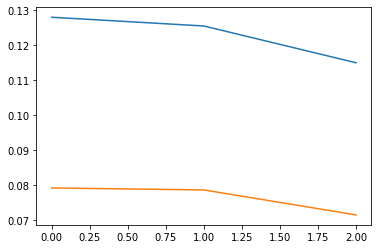

In [21]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Extract the history from the training object
hist = model.fit(train_data, train_labels, 
                       batch_size=10, 
                       epochs=3, 
                       verbose=0, 
                       validation_split=0.2 )

#print(dir(history))
#history.history.keys()
#history.history.keys()
# Plot the training loss 
plt.plot(hist.history['loss'])
# Plot the validation loss
plt.plot(hist.history['val_loss'])

# # # Show the figure
plt.show()

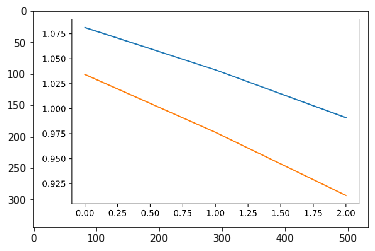

In [10]:
# 預計結果
# <script.py> output:
#     Train on 40 samples, validate on 10 samples
#     Epoch 1/3
    
#     10/40 [======>.......................] - ETA: 0s - loss: 1.0841 - acc: 0.2000
#     40/40 [==============================] - 0s 8ms/step - loss: 1.0812 - acc: 0.2750 - val_loss: 1.0342 - val_acc: 0.6000
#     Epoch 2/3
    
#     10/40 [======>.......................] - ETA: 0s - loss: 1.0686 - acc: 0.6000
#     40/40 [==============================] - 0s 409us/step - loss: 1.0389 - acc: 0.5000 - val_loss: 0.9763 - val_acc: 0.8000
#     Epoch 3/3
    
#     10/40 [======>.......................] - ETA: 0s - loss: 1.0375 - acc: 0.3000
#     40/40 [==============================] - 0s 425us/step - loss: 0.9910 - acc: 0.5750 - val_loss: 0.9132 - val_acc: 0.8000

plt.imshow(plt.imread('model_loss_val_loss.png'))
plt.show()

# 練習
## Using stored weights to predict in a test set
Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set (e.g. test_data).

In [ ]:
# 準備事項
# Load the weights from a file called 'weights.hdf5'.
# Predict the classes of the first three images from test_data.

In [24]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict_classes(test_data) 

array([2, 2, 1, 2, 0, 1, 0, 0, 2, 0], dtype=int64)

In [ ]:
# 預期結果
# In [1]: # Predict from the first three images in the test data
#         model.predict(test_data[:3])
# Out[1]: 
# array([[0.34210655, 0.3343466 , 0.32354683],
#        [0.34009394, 0.33120042, 0.32870564],
#        [0.3223502 , 0.3246222 , 0.3530276 ]], dtype=float32)

# In [2]: 